<a href="https://colab.research.google.com/github/avkornaev/Fast_AI_course/blob/main/Rorschach_labeler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [70]:
from fastai.vision.all import *
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image, ImageOps

Settings

In [71]:
img_No = 0 #an image

In [72]:
path =  Path('/content/gdrive/MyDrive/study/Symmetry')

In [74]:
sym_img_path =Path(path/'Rorschach_images')
if not os.path.exists(sym_img_path ):
    os.makedirs(sym_img_path)

sym_lab_path =Path(path/'Rorschach_labels') 
if not os.path.exists(sym_lab_path):
    os.makedirs(sym_lab_path)


Read image files

In [34]:
fnames = get_image_files(path/'Rorschach_images_raw')
fnames[img_No]

Path('/content/gdrive/MyDrive/study/Symmetry/Rorschach_images_raw/Без названия.png')

In [35]:
len(fnames)

220

Open an image using PIL library

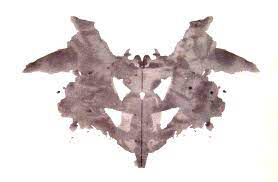

In [60]:
im = Image.open(fnames[img_No])
im

Open an image using OpenCV library

In [66]:
img = np.uint16(cv2.imread(str(fnames[img_No]), cv2.IMREAD_GRAYSCALE))
if img.shape[1]%2 != 0:
  img = np.delete(img,-1,1) #delete the last column
print(img.shape, type(img), img.dtype)

(182, 278) <class 'numpy.ndarray'> uint16


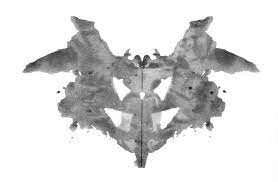

In [63]:
 cv2_imshow(img)

Make it to be symmetrical

(182, 278) <class 'numpy.ndarray'>


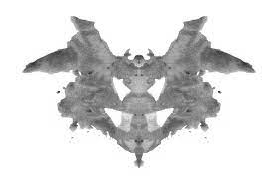

In [67]:
  img_t = np.zeros(img.shape) # заготовка из нулей
  half_img_width = img.shape[1]//2
  img_t[:, 0:half_img_width] = 1 #левая сторона единицы
  img_t.shape
  print(img_t.shape, type(img_t))
  iiz = img*img_t
  iiz2 = iiz + cv2.flip(iiz,1)
  cv2_imshow(iiz2)

Изображения в датасете сделаны симметричными, поэтому маски к ним можно сделать одинаковые: 0 для левой стороны, 1 для правой.

In [ ]:
for ind, o in enumerate(fnames):
  #open image as a numpy array
  img = np.uint16(cv2.imread(str(o), cv2.IMREAD_GRAYSCALE))
  #make it to be of even width
  if img.shape[1]%2 != 0:
    img = np.delete(img,-1,1) #delete the last column
  #create mask
  img_mask = np.zeros(img.size) # заготовка из нулей
  half_img_width = img.shape[1]//2
  img_mask[:, 0:half_img_width] = 1 #левая сторона единицы
  
  #make the image to be symmetrical
  half_img = img*img_mask
  img_sym = half_img + cv2.flip(half_img,1)
  
  #save image and mask
  save_path_img = str(o)[0:49]+'labels/'+str(o)[56:-4] + str(o)[-4:]
  save_path_lab = str(o)[0:49]+'labels/'+str(o)[56:-4] + '_P' + str(o)[-4:]
  #img_t[:, 0:half_img_width] = 1 #левая сторона единицы
  cv2.imwrite(save_path_img, img_sym) # save image of mask
  cv2.imwrite(save_path_lab, img_mask) # save image of mask
  if img.size != img_t.shape:
    print('Warning: image and label sizes are different', img.size, img_t.shape)